

# **IMPORT PACKAGE**



In [1]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tkinter as tk
from tkinter import ttk
import pandas as pd

# **DATA PRE-PROCESSING**

## **Data Cleaning**

In [4]:
df = pd.read_csv("/content/lifeExpectancy_uncleaned.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23380 entries, 0 to 23379
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           23380 non-null  object 
 1   Year                                              23380 non-null  int64  
 2   childMortalityRate                                14200 non-null  float64
 3   GDP_per_Capita                                    6562 non-null   float64
 4   lifeExpectancy                                    18722 non-null  float64
 5   totalPopulationPoverty                            2705 non-null   float64
 6   birthRate                                         20466 non-null  float64
 7   percentage_of_totalUrbanPopulation                14427 non-null  float64
 8   percentageUsage_of_safely_managed_drinking_water  3784 non-null   float64
 9   totalHealthcareEx

In [6]:
df.describe()

Year  childMortalityRate  GDP_per_Capita  lifeExpectancy  \
count  23380.000000        14200.000000     6562.000000    18722.000000   
mean    1982.215697            8.009897    18307.128922       63.778500   
std       32.556933            8.409812    20344.959620       12.020997   
min     1751.000000            0.146058      430.413540       10.989000   
25%     1965.000000            1.811918     3726.793100       55.989250   
50%     1987.000000            4.703670    10638.246000       66.433000   
75%     2006.000000           11.561593    26873.173500       72.825750   
max     2024.000000           57.149690   157600.640000       86.372000   

       totalPopulationPoverty     birthRate  \
count            2.705000e+03  20466.000000   
mean             7.487074e+07     28.379308   
std              2.470936e+08     13.049488   
min              0.000000e+00      3.519000   
25%              2.500400e+04     16.776250   
50%              4.014050e+05     27.358500   
75%              6.834698e+06     39.987000   
max              2.015961e+09     58.627000   

       percentage_of_totalUrbanPopulation  \
count                        14427.000000   
mean                            51.437850   
std                             25.415371   
min                              2.077000   
25%                             30.613000   
50%                             50.614000   
75%                             71.856000   
max                            100.000000   

       percentageUsage_of_safely_managed_drinking_water  \
count                                       3784.000000   
mean                                          68.667447   
std                                           30.188662   
min                                            1.430447   
25%                                           45.533296   
50%                                           77.848870   
75%                                           96.426470   
max                                          100.000000   

       totalHealthcareExpenditure  
count                 4289.000000  
mean                     6.256225  
std                      2.974621  
min                      1.110000  
25%                      4.200000  
50%                      5.670000  
75%                      7.880000  
max                     50.180000

In [7]:
print(df.isnull().sum())

Country                                                 0
Year                                                    0
childMortalityRate                                   9180
GDP_per_Capita                                      16818
lifeExpectancy                                       4658
totalPopulationPoverty                              20675
birthRate                                            2914
percentage_of_totalUrbanPopulation                   8953
percentageUsage_of_safely_managed_drinking_water    19596
totalHealthcareExpenditure                          19091
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
print(df.isnull().sum())

Country                                             0
Year                                                0
childMortalityRate                                  0
GDP_per_Capita                                      0
lifeExpectancy                                      0
totalPopulationPoverty                              0
birthRate                                           0
percentage_of_totalUrbanPopulation                  0
percentageUsage_of_safely_managed_drinking_water    0
totalHealthcareExpenditure                          0
dtype: int64


In [10]:
df.head()

Country  Year  childMortalityRate  GDP_per_Capita  lifeExpectancy  \
316  Albania  2002            2.433871       6753.9140          75.299   
319  Albania  2005            1.996499       8040.1206          76.427   
322  Albania  2008            1.575113       9912.1970          78.248   
326  Albania  2012            1.121319      11228.0050          78.084   
328  Albania  2014            0.992791      11586.8740          78.029   

     totalPopulationPoverty  birthRate  percentage_of_totalUrbanPopulation  \
316                 33337.0     15.585                              43.501   
319                 17800.0     13.862                              46.731   
322                  5892.0     12.209                              49.991   
326                 18003.0     12.868                              54.330   
328                 29558.0     13.071                              56.423   

     percentageUsage_of_safely_managed_drinking_water  \
316                                         48.984764   
319                                         52.578330   
322                                         58.328480   
326                                         66.380850   
328                                         70.563260   

     totalHealthcareExpenditure  
316                        5.66  
319                        5.73  
322                        5.51  
326                        6.16  
328                        6.43

In [11]:
print(df.duplicated().sum())

0


In [12]:
df = df[df['Country'] != 'World']

In [13]:
df

Country  Year  childMortalityRate  GDP_per_Capita  lifeExpectancy  \
316     Albania  2002            2.433871       6753.9140          75.299   
319     Albania  2005            1.996499       8040.1206          76.427   
322     Albania  2008            1.575113       9912.1970          78.248   
326     Albania  2012            1.121319      11228.0050          78.084   
328     Albania  2014            0.992791      11586.8740          78.029   
...         ...   ...                 ...             ...             ...   
22729   Vietnam  2018            2.131359       9636.0140          74.100   
22731   Vietnam  2020            2.089975      10450.6210          75.383   
23366  Zimbabwe  2011            7.998670       2033.1814          53.911   
23372  Zimbabwe  2017            5.578956       2331.7808          60.263   
23374  Zimbabwe  2019            5.237655       2203.3967          61.060   

       totalPopulationPoverty  birthRate  percentage_of_totalUrbanPopulation  \
316                   33337.0     15.585                              43.501   
319                   17800.0     13.862                              46.731   
322                    5892.0     12.209                              49.991   
326                   18003.0     12.868                              54.330   
328                   29558.0     13.071                              56.423   
...                       ...        ...                                 ...   
22729               1168814.0     15.438                              35.919   
22731                631868.0     15.234                              37.340   
23366               2810964.0     38.142                              33.015   
23372               5045768.0     31.813                              32.237   
23374               6104153.0     31.121                              32.210   

       percentageUsage_of_safely_managed_drinking_water  \
316                                           48.984764   
319                                           52.578330   
322                                           58.328480   
326                                           66.380850   
328                                           70.563260   
...                                                 ...   
22729                                         55.661610   
22731                                         56.730350   
23366                                         28.014801   
23372                                         26.944588   
23374                                         26.683977   

       totalHealthcareExpenditure  
316                          5.66  
319                          5.73  
322                          5.51  
326                          6.16  
328                          6.43  
...                           ...  
22729                        5.03  
22731                        4.30  
23366                        8.08  
23372                        6.36  
23374                        3.23  

[1265 rows x 10 columns]

Rows named "World" in "Country" column has been removed. Proven from number of rows that decreasing from 1287 to 1265 rows.

In [14]:
df.describe(include = object)

Country
count         1265
unique         108
top     Costa Rica
freq            22

In [15]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Year', 'childMortalityRate', 'GDP_per_Capita', 'lifeExpectancy',
       'totalPopulationPoverty', 'birthRate',
       'percentage_of_totalUrbanPopulation',
       'percentageUsage_of_safely_managed_drinking_water',
       'totalHealthcareExpenditure'],
      dtype='object')

In [16]:
unique_years = df['Year'].unique()
unique_years

array([2002, 2005, 2008, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2011, 2001, 2003, 2004, 2006, 2007, 2009, 2010, 2013, 2021, 2000])

In [17]:
unique_country = df['Country'].unique()
unique_country

array(['Albania', 'Algeria', 'Armenia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Bhutan',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea-Bissau', 'Honduras', 'Hungary', 'Iceland', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kiribati', 'Kyrgyzstan', 'Laos', 'Latvia',
       'Lebanon', 'Lesotho', 'Lithuania', 'Luxembourg', 'Madagascar',
       'Malawi', 'Malaysia', 'Malta', 'Mexico', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands',
       'Nicaragua', 'Nigeria', 'North Macedonia', 'Norwa

## **Handling outliers**

### **Check for outliers**

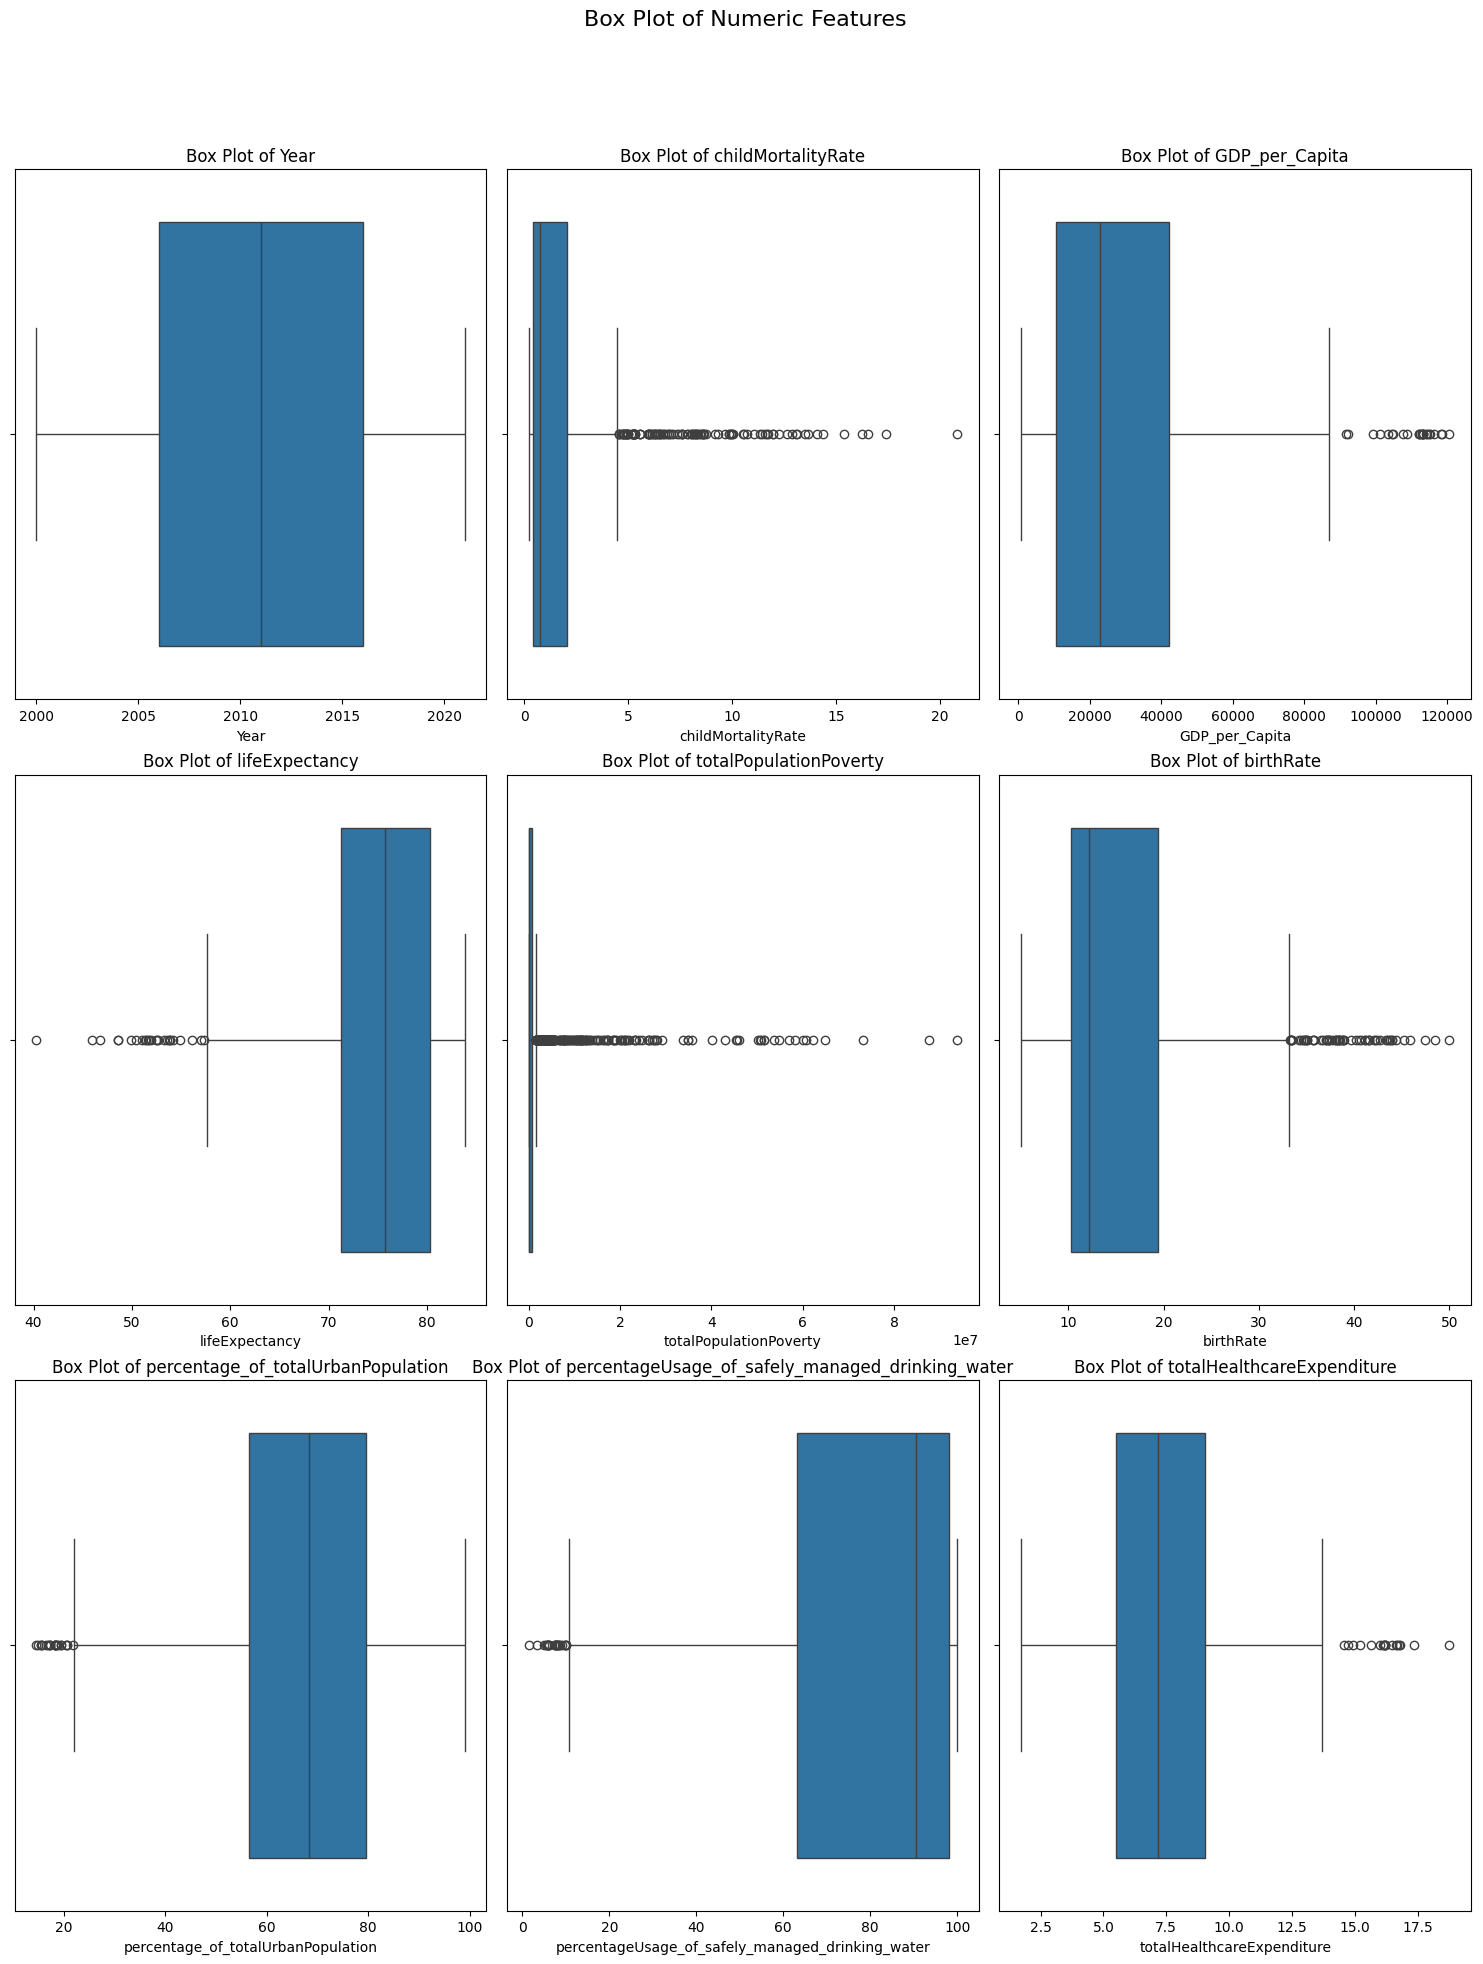

In [18]:
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
fig.suptitle('Box Plot of Numeric Features', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(numeric_columns):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [19]:
# Select numeric columns from the dataset
numeric_columns = df.select_dtypes(include=['number']).columns

# Function to find outliers using the IQR method
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Iterate through each numeric column in the dataset
for col in numeric_columns:
    outliers = find_outliers_iqr(df[col])
    if not outliers.empty:
        print(f"Outliers in column '{col}':")
        print(outliers)
        print("-" * 20)

Outliers in column 'childMortalityRate':
1517     6.940103
1518     6.447319
1519     5.995237
1520     5.581424
1521     5.212133
           ...   
22413    5.579504
22414    5.261806
23366    7.998670
23372    5.578956
23374    5.237655
Name: childMortalityRate, Length: 112, dtype: float64
--------------------
Outliers in column 'GDP_per_Capita':
9886      91791.440
9887     104671.875
12375     99301.520
12376    101143.150
12377    103317.330
12378    104743.000
12379    107634.836
12380    108632.360
12381    113346.040
12382    120647.820
12383    118154.664
12384    112230.080
12385    114343.984
12386    112998.390
12387    112137.130
12388    113050.664
12389    113313.580
12390    113182.730
12391    116283.700
12392    114985.840
12393    114164.470
12394    115209.600
12395    112274.820
12396    118510.000
17160     92177.590
Name: GDP_per_Capita, dtype: float64
--------------------
Outliers in column 'lifeExpectancy':
3674     49.873
3687     40.279
3833     48.609
3841  

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1265 entries, 316 to 23374
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           1265 non-null   object 
 1   Year                                              1265 non-null   int64  
 2   childMortalityRate                                1265 non-null   float64
 3   GDP_per_Capita                                    1265 non-null   float64
 4   lifeExpectancy                                    1265 non-null   float64
 5   totalPopulationPoverty                            1265 non-null   float64
 6   birthRate                                         1265 non-null   float64
 7   percentage_of_totalUrbanPopulation                1265 non-null   float64
 8   percentageUsage_of_safely_managed_drinking_water  1265 non-null   float64
 9   totalHealthcareExpend

## **SAVE CLEANED DATA**

In [21]:
df.to_csv('lifeExpectancy_cleaned.csv', index=False)

## **Exploratory Data Analysis**

In [22]:
df2 = pd.read_csv("/content/lifeExpectancy_cleaned.csv")

In [23]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=788de19aa5fe97a1c4ebec54213dc29b3a742dedf4067ec85b55d81f3c15e899
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [24]:
import ydata_profiling as pp
#Interactive and comprehensive EDA/ data description

# forming ProfileReport and save
# as output.html file
profile = pp.ProfileReport(df2)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:

# Check for missing values and display dataset summary
print("Missing values per column:\n", df2.isnull().sum())
df2.describe(include='all').T


Missing values per column:
 Country                                             0
Year                                                0
childMortalityRate                                  0
GDP_per_Capita                                      0
lifeExpectancy                                      0
totalPopulationPoverty                              0
birthRate                                           0
percentage_of_totalUrbanPopulation                  0
percentageUsage_of_safely_managed_drinking_water    0
totalHealthcareExpenditure                          0
dtype: int64


count unique         top  \
Country                                             1265    108  Costa Rica   
Year                                              1265.0    NaN         NaN   
childMortalityRate                                1265.0    NaN         NaN   
GDP_per_Capita                                    1265.0    NaN         NaN   
lifeExpectancy                                    1265.0    NaN         NaN   
totalPopulationPoverty                            1265.0    NaN         NaN   
birthRate                                         1265.0    NaN         NaN   
percentage_of_totalUrbanPopulation                1265.0    NaN         NaN   
percentageUsage_of_safely_managed_drinking_water  1265.0    NaN         NaN   
totalHealthcareExpenditure                        1265.0    NaN         NaN   

                                                 freq            mean  \
Country                                            22             NaN   
Year                                              NaN     2011.211067   
childMortalityRate                                NaN        1.738005   
GDP_per_Capita                                    NaN    27460.644186   
lifeExpectancy                                    NaN       74.880047   
totalPopulationPoverty                            NaN  2486114.448221   
birthRate                                         NaN       15.606062   
percentage_of_totalUrbanPopulation                NaN       66.643202   
percentageUsage_of_safely_managed_drinking_water  NaN        77.71814   
totalHealthcareExpenditure                        NaN        7.285771   

                                                             std       min  \
Country                                                      NaN       NaN   
Year                                                    5.941077    2000.0   
childMortalityRate                                      2.417003  0.199331   
GDP_per_Capita                                       21350.59443  733.5419   
lifeExpectancy                                          6.546712    40.279   
totalPopulationPoverty                            8592511.411265       0.0   
birthRate                                               7.894328     5.001   
percentage_of_totalUrbanPopulation                     17.535048    14.538   
percentageUsage_of_safely_managed_drinking_water        25.44952  1.430447   
totalHealthcareExpenditure                              2.521615      1.72   

                                                        25%       50%  \
Country                                                 NaN       NaN   
Year                                                 2006.0    2011.0   
childMortalityRate                                 0.418402   0.73128   
GDP_per_Capita                                    10668.758  22970.55   
lifeExpectancy                                       71.233    75.701   
totalPopulationPoverty                               9337.0   68836.0   
birthRate                                             10.24    12.132   
percentage_of_totalUrbanPopulation                   56.463    68.416   
percentageUsage_of_safely_managed_drinking_water  63.051792  90.58958   
totalHealthcareExpenditure                             5.51      7.18   

                                                        75%         max  
Country                                                 NaN         NaN  
Year                                                 2016.0      2021.0  
childMortalityRate                                 2.048283   20.840101  
GDP_per_Capita                                     42074.92   120647.82  
lifeExpectancy                                       80.337      83.852  
totalPopulationPoverty                             637236.0  93840888.0  
birthRate                                             19.43      50.028  
percentage_of_totalUrbanPopulation                   79.577      99.078  
percentageUsage_of_safely_managed_drinking_water

## **Correlation Analysis**

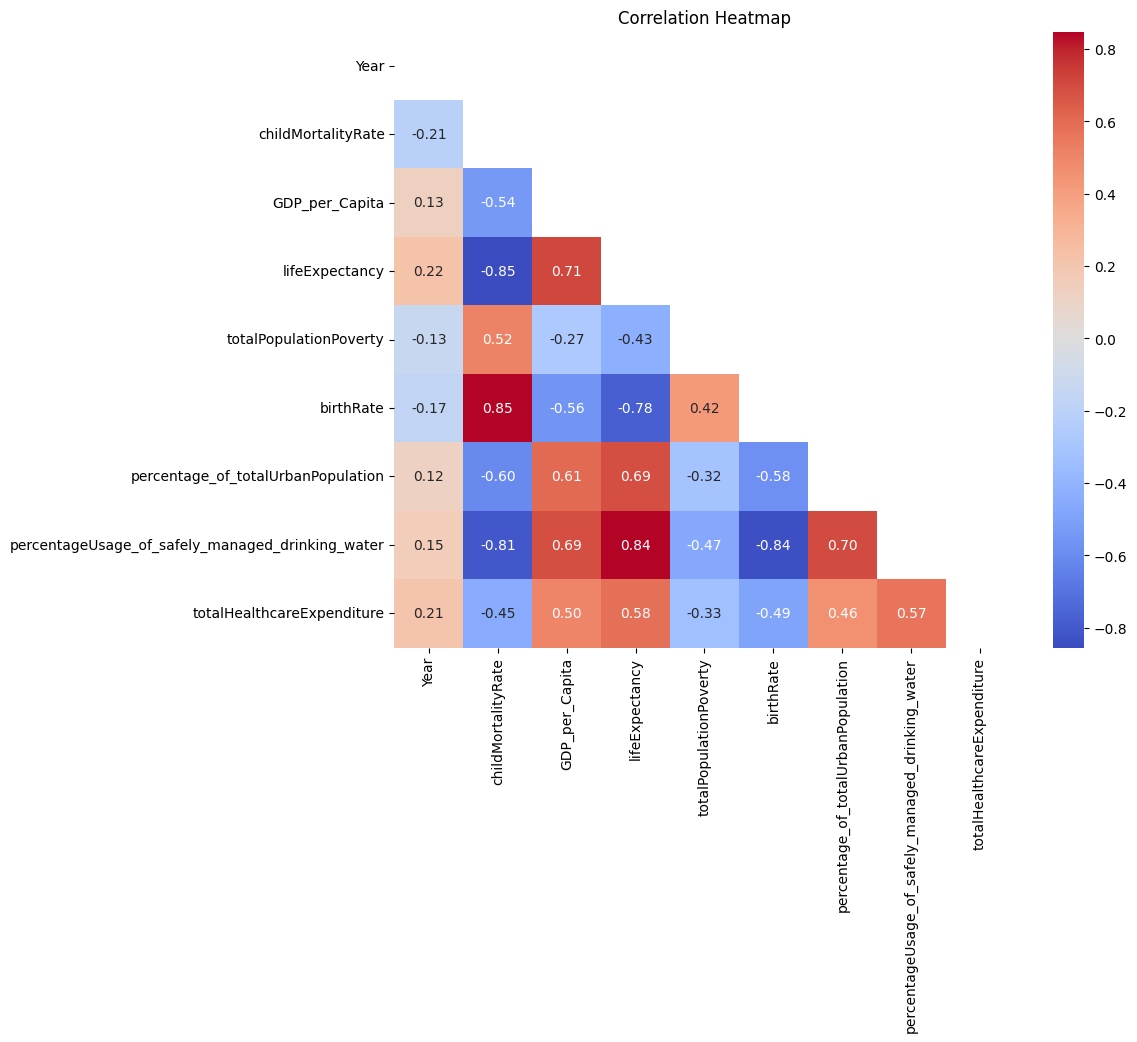

In [26]:
df_numeric = df2.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title("Correlation Heatmap")
plt.show()


## **Feature selection**

In [27]:
# Define the features and target variable
X = df2.drop(columns=["lifeExpectancy" ])
y = df2["lifeExpectancy"]

## **Split Data  (train & test)**

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Separate categorical and numerical columns
categorical_features = ["Country"]
numerical_features = [
    "Year", "childMortalityRate", "GDP_per_Capita", "totalPopulationPoverty",
    "birthRate", "percentage_of_totalUrbanPopulation",
    "percentageUsage_of_safely_managed_drinking_water", "totalHealthcareExpenditure"
]

In [31]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [32]:
# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

In [33]:
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'childMortalityRate',
                                                   'GDP_per_Capita',
                                                   'totalPopulationPoverty',
                                                   'birthRate',
                                                   'percentage_of_totalUrbanPopulation',
                                                   'percentageUsage_of_safely_managed_drinking_water',
                                                   'totalHealthcareExpenditure']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Feature Importance

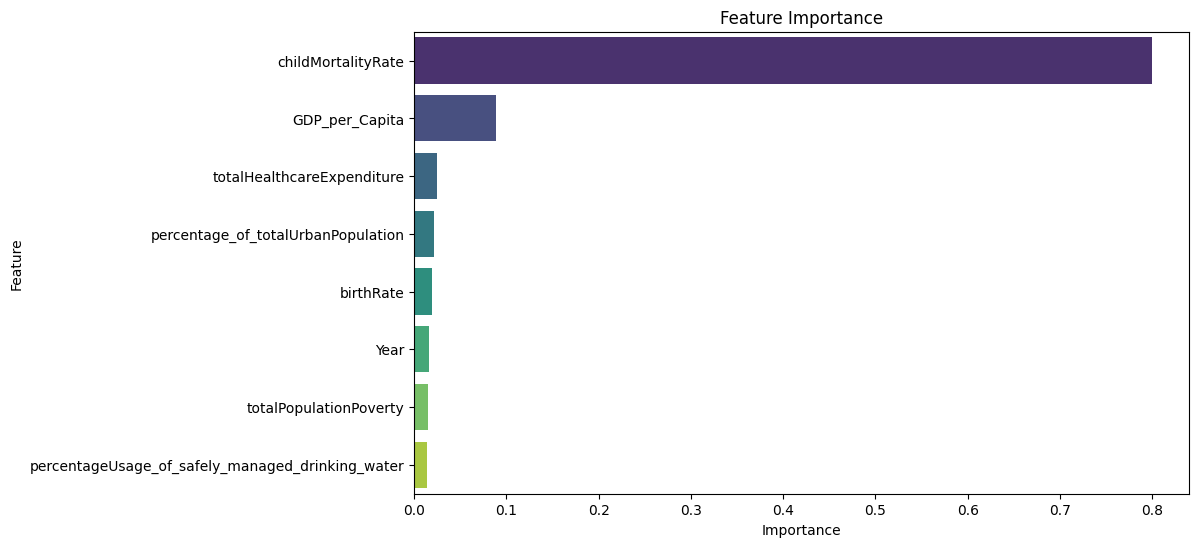

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Instead of redefining X, use a copy of X and drop 'Country' for feature importance analysis
X_feature_importance = X.drop(columns=["Country"])
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_feature_importance, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_fi, y_train_fi)

# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X_feature_importance.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()

# **MACHINE LEARNING MODEL**

In [35]:
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse**0.5 # calculate RMSE
mae = mean_absolute_error(y_test, y_pred) # calculate MAE

In [36]:
#  Define Hyperparameter Grids for Models
param_grids = {
    "K-Nearest Neighbors": {
        "regressor__n_neighbors": [3, 5, 7, 10],
        "regressor__weights": ["uniform", "distance"]
    },
    "Random Forest": {
        "regressor__n_estimators": [50, 100, 200],
        "regressor__max_depth": [None, 10, 20],
        "regressor__min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "regressor__n_estimators": [50, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 10]
    },
    "CatBoost": {
        "regressor__iterations": [50, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__depth": [3, 5, 10]
    },
    "Linear Regression": {},  # No hyperparameters to tune for Linear Regression
}

In [37]:
# Define Baseline Models
def baseline_models():
    return {
        "Linear Regression": LinearRegression(),
        "K-Nearest Neighbors": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
    }

In [38]:
#Train and Evaluate Baseline Models
print("Training baseline models...")
models = baseline_models()
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    # Apply fit_transform on the preprocessor step first for compatibility with PCA
    X_train_transformed = pipeline.named_steps['preprocessor'].fit_transform(X_train)
    # Fit the regressor model using the transformed training data
    pipeline.named_steps['regressor'].fit(X_train_transformed, y_train)
    # Transform the test data before prediction
    X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
    # Predict on the transformed test data
    y_pred = pipeline.named_steps['regressor'].predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mse**0.5 # calculate RMSE
    mae = mean_absolute_error(y_test, y_pred) # calculate MAE
    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }
    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Training baseline models...
Linear Regression - MSE: 1.9690, RMSE: 1.4032, MAE: 0.7089, R2: 0.9576
K-Nearest Neighbors - MSE: 2.8462, RMSE: 1.6871, MAE: 0.7184, R2: 0.9388
Random Forest - MSE: 2.3999, RMSE: 1.5492, MAE: 0.7053, R2: 0.9484
XGBoost - MSE: 2.0883, RMSE: 1.4451, MAE: 0.6045, R2: 0.9551
CatBoost - MSE: 1.5852, RMSE: 1.2590, MAE: 0.5516, R2: 0.9659


In [39]:
print("\nEvaluating models based on all metrics...")

# Define weights for each metric (optional, for ranking models)
weights = {"R2": 0.4, "MSE": 0.2, "RMSE": 0.2, "MAE": 0.2}

# Create a ranking based on weighted scores
model_scores = {}
for name, metrics in results.items():
    # Normalize metrics (lower is better for MSE, RMSE, MAE; higher is better for R2)
    normalized_r2 = metrics["R2"]  # Higher is better
    normalized_mse = 1 / (metrics["MSE"] + 1e-9)  # Lower is better
    normalized_rmse = 1 / (metrics["RMSE"] + 1e-9)  # Lower is better
    normalized_mae = 1 / (metrics["MAE"] + 1e-9)  # Lower is better

    # Calculate the weighted score
    score = (
        weights["R2"] * normalized_r2 +
        weights["MSE"] * normalized_mse +
        weights["RMSE"] * normalized_rmse +
        weights["MAE"] * normalized_mae
    )
    model_scores[name] = score

# Identify the best model based on the highest score
best_model_name = max(model_scores, key=model_scores.get)
print("Model Rankings:")
for name, score in sorted(model_scores.items(), key=lambda x: x[1], reverse=True):
    metrics = results[name]
    print(f" - {name}: Score = {score:.4f}, R2 = {metrics['R2']:.4f}, MSE = {metrics['MSE']:.4f}, RMSE = {metrics['RMSE']:.4f}, MAE = {metrics['MAE']:.4f}")

print("\nBest Model Based on Combined Metrics:")
best_metrics = results[best_model_name]
print(f" - {best_model_name}: R2 = {best_metrics['R2']:.4f}, MSE = {best_metrics['MSE']:.4f}, RMSE = {best_metrics['RMSE']:.4f}, MAE = {best_metrics['MAE']:.4f}")



Evaluating models based on all metrics...
Model Rankings:
 - CatBoost: Score = 1.0339, R2 = 0.9659, MSE = 1.5852, RMSE = 1.2590, MAE = 0.5516
 - XGBoost: Score = 0.9470, R2 = 0.9551, MSE = 2.0883, RMSE = 1.4451, MAE = 0.6045
 - Linear Regression: Score = 0.9093, R2 = 0.9576, MSE = 1.9690, RMSE = 1.4032, MAE = 0.7089
 - Random Forest: Score = 0.8754, R2 = 0.9484, MSE = 2.3999, RMSE = 1.5492, MAE = 0.7053
 - K-Nearest Neighbors: Score = 0.8427, R2 = 0.9388, MSE = 2.8462, RMSE = 1.6871, MAE = 0.7184

Best Model Based on Combined Metrics:
 - CatBoost: R2 = 0.9659, MSE = 1.5852, RMSE = 1.2590, MAE = 0.5516


In [40]:
#  Identify Top-Performing Models
print("\nIdentifying top-performing models...")
top_models = [name for name, metrics in results.items() if metrics["R2"] > 0.5]
print("Top-Performing Models:", top_models)



Identifying top-performing models...
Top-Performing Models: ['Linear Regression', 'K-Nearest Neighbors', 'Random Forest', 'XGBoost', 'CatBoost']


In [41]:
#  Hyperparameter Optimization for Top-Performing Models
print("\nPerforming hyperparameter tuning...")
optimized_results = {}
for name in top_models:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", models[name])
    ])
    param_grid = param_grids.get(name, {})
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)

        # Apply fit_transform on the preprocessor step first for compatibility
        X_train_transformed = pipeline.named_steps['preprocessor'].fit_transform(X_train)
        # Fit the regressor model using the transformed training data
        pipeline.named_steps['regressor'].fit(X_train_transformed, y_train)

        grid_search.fit(X_train, y_train)  # This line might still raise AttributeError
        best_model = grid_search.best_estimator_

        # Transform test data before prediction
        X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
        # Predict using transformed test data
        y_pred = best_model.named_steps['regressor'].predict(X_test_transformed)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        optimized_results[name] = {
            "MSE": mse,
            "R2": r2,
            "RMSE": mse**0.5,
            "MAE": mean_absolute_error(y_test, y_pred)
        }

        print(f"{name} Hyperparameter Tuning")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Mean Squared Error: {mse}")
        print(f"R-Squared: {r2}\n")


Performing hyperparameter tuning...
K-Nearest Neighbors Hyperparameter Tuning
Best Parameters: {'regressor__n_neighbors': 3, 'regressor__weights': 'distance'}
Mean Squared Error: 2.5749261977610205
R-Squared: 0.9445881816261699

Random Forest Hyperparameter Tuning
Best Parameters: {'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Mean Squared Error: 2.3772534726408683
R-Squared: 0.9488420531162896

XGBoost Hyperparameter Tuning
Best Parameters: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 50}
Mean Squared Error: 22.06821712251734
R-Squared: 0.5250970532318648

CatBoost Hyperparameter Tuning
Best Parameters: {'regressor__depth': 5, 'regressor__iterations': 200, 'regressor__learning_rate': 0.2}
Mean Squared Error: 1.5650827253226574
R-Squared: 0.9663197804305974



In [42]:
#  Summarize Results
baseline_results_df = pd.DataFrame(results).T
optimized_results_df = pd.DataFrame(optimized_results).T

print("Baseline Results:")
print(baseline_results_df.sort_values(by="R2", ascending=False))

print("\nOptimized Results:")
print(optimized_results_df.sort_values(by="R2", ascending=False))

Baseline Results:
                          MSE      RMSE       MAE        R2
CatBoost             1.585161  1.259032  0.551639  0.965888
Linear Regression    1.968981  1.403204  0.708901  0.957628
XGBoost              2.088316  1.445101  0.604538  0.955060
Random Forest        2.399949  1.549177  0.705268  0.948354
K-Nearest Neighbors  2.846157  1.687056  0.718426  0.938751

Optimized Results:
                           MSE        R2      RMSE       MAE
CatBoost              1.565083  0.966320  1.251033  0.651319
Random Forest         2.377253  0.948842  1.541834  0.709188
K-Nearest Neighbors   2.574926  0.944588  1.604658  0.566946
XGBoost              22.068217  0.525097  4.697682  3.499061


fgv


fgv

fgv